# Preparing notebook and folders

In [1]:
import os

import numpy as np
np.random.seed(18)
import matplotlib.pyplot as plt

from F4_func_file import *

In [2]:
#Create folder for storing generated data files
if not os.path.exists("Simulated_data"):
    os.mkdir("Simulated_data")

# Generating the data

In [3]:
#The fixed parameters
number_of_samples = 100    #The publication Figure 4 was evaluated on 1000 per graph point; RL algortihm takes days to process, reducing to 100
image_size = 50
Poisson_noise = 10

#Parameters estimated from the measured calibration data
emitter_power = 23000
PSF_width = 2.05

## Generate dataset for the Emitter Concentration graph

In [4]:
#Horizontal axis
concentration_axis_array = np.logspace(np.log10(50), np.log10(500), 101).round(0).astype("int")

In [5]:
#Generating the simulated dataset using parameters from optical experiment
simulated_data_low_res = np.zeros((concentration_axis_array.shape[0], number_of_samples, image_size, image_size))
simulated_data_high_res = np.zeros((concentration_axis_array.shape[0], number_of_samples, image_size, image_size))

for i in range(concentration_axis_array.shape[0]):
    simulated_data_low_res[i], simulated_data_high_res[i] = Generate_normed_dataset_for_experiment(number_of_samples, image_size, emitter_power, 
                                                                                                   Poisson_noise, PSF_width, concentration_axis_array[i])

In [6]:
#Save the dataset
np.save("Simulated_data/Simulated_data_low_res.npy", simulated_data_low_res)
np.save("Simulated_data/Simulated_data_high_res.npy", simulated_data_high_res)
np.save("Simulated_data/Simulated_axis_array.npy", concentration_axis_array)

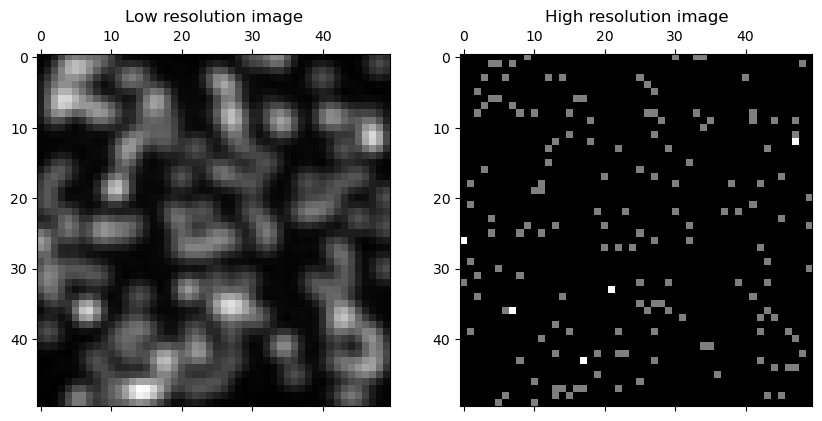

In [7]:
#Show an example of a generated data pair
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.matshow(simulated_data_low_res[50,0], cmap="gray", fignum=False)
plt.title("Low resolution image")

plt.subplot(122)
plt.matshow(simulated_data_high_res[50,0], cmap="gray", fignum=False)
plt.title("High resolution image")

plt.show()

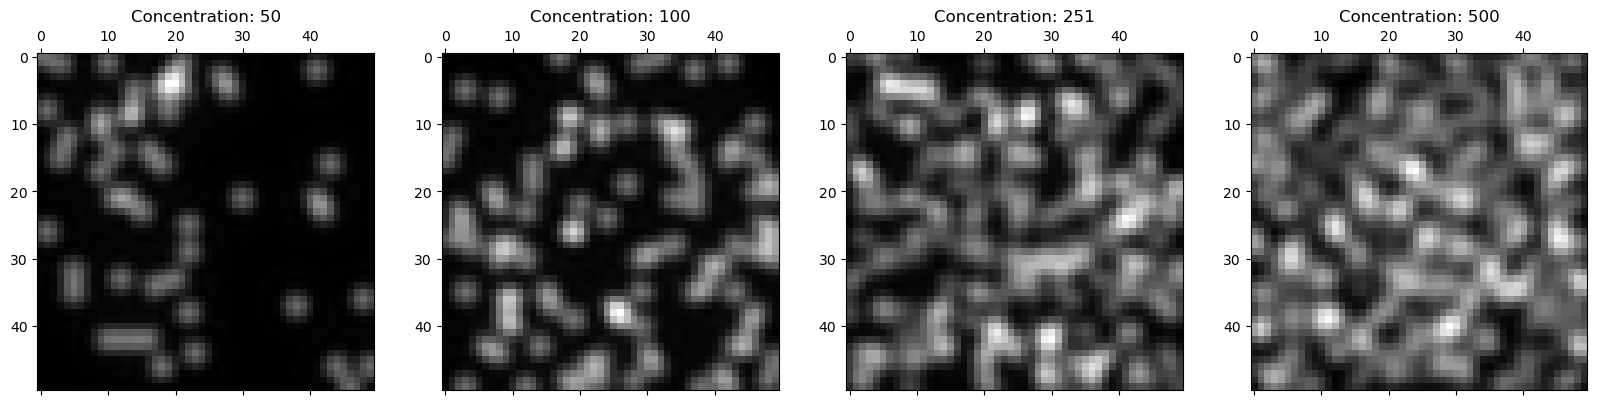

In [8]:
#Show examples for various Concentration values
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.matshow(simulated_data_low_res[0,0], cmap="gray", fignum=False)
plt.title("Concentration: " + str(concentration_axis_array[0]))
plt.subplot(142)
plt.matshow(simulated_data_low_res[30,0], cmap="gray", fignum=False)
plt.title("Concentration: " + str(concentration_axis_array[30]))
plt.subplot(143)
plt.matshow(simulated_data_low_res[70,0], cmap="gray", fignum=False)
plt.title("Concentration: " + str(concentration_axis_array[70]))
plt.subplot(144)
plt.matshow(simulated_data_low_res[-1,0], cmap="gray", fignum=False)
plt.title("Concentration: " + str(concentration_axis_array[-1]))

plt.show()